In [2]:
#!sudo apt-get update && sudo apt-get install -y python3 python3-dev python3-pip && sudo -H python3 -m pip install jupyter notebook ipykernel tensorflow

%pip install git+git://github.com/titipata/pubmed_parser.git

%pip install pandas

%pip install nltk

! python -m pip install requests

%pip install bs4

%pip install dask
! python -m pip install dask[dataframe]

! python -m pip install 'fsspec>=0.3.3'


  Cloning git://github.com/titipata/pubmed_parser.git to /tmp/pip-req-build-gc7ak96i
  Running command git clone -q git://github.com/titipata/pubmed_parser.git /tmp/pip-req-build-gc7ak96i
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup as Soup
import re
import requests as req

website = 'https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/'
requests = req.get(website)

soup = Soup(requests.content,'html.parser')

a_tags = soup.find_all('a', text = re.compile(r".xml.gz$"))
a_tags

[<a href="pubmed21n0001.xml.gz">pubmed21n0001.xml.gz</a>,
 <a href="pubmed21n0002.xml.gz">pubmed21n0002.xml.gz</a>,
 <a href="pubmed21n0003.xml.gz">pubmed21n0003.xml.gz</a>,
 <a href="pubmed21n0004.xml.gz">pubmed21n0004.xml.gz</a>,
 <a href="pubmed21n0005.xml.gz">pubmed21n0005.xml.gz</a>,
 <a href="pubmed21n0006.xml.gz">pubmed21n0006.xml.gz</a>,
 <a href="pubmed21n0007.xml.gz">pubmed21n0007.xml.gz</a>,
 <a href="pubmed21n0008.xml.gz">pubmed21n0008.xml.gz</a>,
 <a href="pubmed21n0009.xml.gz">pubmed21n0009.xml.gz</a>,
 <a href="pubmed21n0010.xml.gz">pubmed21n0010.xml.gz</a>,
 <a href="pubmed21n0011.xml.gz">pubmed21n0011.xml.gz</a>,
 <a href="pubmed21n0012.xml.gz">pubmed21n0012.xml.gz</a>,
 <a href="pubmed21n0013.xml.gz">pubmed21n0013.xml.gz</a>,
 <a href="pubmed21n0014.xml.gz">pubmed21n0014.xml.gz</a>,
 <a href="pubmed21n0015.xml.gz">pubmed21n0015.xml.gz</a>,
 <a href="pubmed21n0016.xml.gz">pubmed21n0016.xml.gz</a>,
 <a href="pubmed21n0017.xml.gz">pubmed21n0017.xml.gz</a>,
 <a href="pubm

In [4]:
%%time

import urllib.request
for links in a_tags :
  file_extension = links.get('href')

  urllib.request.urlretrieve(website + file_extension, file_extension)

  print(website + file_extension)


https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0001.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0002.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0003.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0004.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0005.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0006.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0007.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0008.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0009.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0010.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0011.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0012.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0013.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0014.xml.gz
https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed21n0015.xml.gz
https://ft

In [5]:
%%time

import pubmed_parser as pp
import pandas as pd
import os

starting_string = 'pubmed21n'
ending_string = '.xml.gz'

starting_number = 1
ending_number = 1062


for idx in range(starting_number, ending_number + 1) :
  file_in = starting_string + str("%04d" % idx) + ending_string

  dictionary = pp.parse_medline_xml(file_in, year_info_only=False)

  pandas_df = pd.DataFrame(dictionary)

  data_frame_out = pandas_df[pandas_df['abstract'] != '']['abstract']

  file_out = 'abstract' + str("%04d" % idx) + '.csv'

  data_frame_out.to_csv(file_out, index = False)

  os.remove(file_in)

  print(file_out)

abstract0001.csv
abstract0002.csv
abstract0003.csv
abstract0004.csv
abstract0005.csv
abstract0006.csv
abstract0007.csv
abstract0008.csv
abstract0009.csv
abstract0010.csv
abstract0011.csv
abstract0012.csv
abstract0013.csv
abstract0014.csv
abstract0015.csv
abstract0016.csv
abstract0017.csv
abstract0018.csv
abstract0019.csv
abstract0020.csv
abstract0021.csv
abstract0022.csv
abstract0023.csv
abstract0024.csv
abstract0025.csv
abstract0026.csv
abstract0027.csv
abstract0028.csv
abstract0029.csv
abstract0030.csv
abstract0031.csv
abstract0032.csv
abstract0033.csv
abstract0034.csv
abstract0035.csv
abstract0036.csv
abstract0037.csv
abstract0038.csv
abstract0039.csv
abstract0040.csv
abstract0041.csv
abstract0042.csv
abstract0043.csv
abstract0044.csv
abstract0045.csv
abstract0046.csv
abstract0047.csv
abstract0048.csv
abstract0049.csv
abstract0050.csv
abstract0051.csv
abstract0052.csv
abstract0053.csv
abstract0054.csv
abstract0055.csv
abstract0056.csv
abstract0057.csv
abstract0058.csv
abstract0059.c

In [6]:
%%time
import dask.dataframe as dd

dask_df = dd.read_csv('abstract*.csv')

CPU times: user 663 ms, sys: 91.4 ms, total: 754 ms
Wall time: 849 ms


In [7]:
%%time

dask_df.to_csv('abstract_ultimate.csv')

CPU times: user 24min 52s, sys: 3min 38s, total: 28min 30s
Wall time: 22min 27s


['/home/char/sjsu/stemaway/abstract_ultimate.csv/0000.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0001.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0002.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0003.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0004.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0005.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0006.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0007.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0008.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0009.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0010.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0011.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0012.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0013.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0014.part',
 '/home/char/sjsu/stemaway/abstract_ultimate.csv/0015.part',
 '/home/char/sjsu/stemaw

In [8]:
dask_df

,abstract
npartitions=1061,
,object
,...
...,...
,...
,...


In [9]:
dask_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 1 entries, abstract to abstract
dtypes: object(1)

In [10]:
!ls | grep -i "../*.xml.gz"

!rm -f $(ls | grep -i "../*.xml.gz")

#!rm -f $(ls | grep -i "../*.csv")

pubmed21n1062.xml.gz


In [5]:
%%time
import pandas as pd

pandas_df = pd.read_csv('abstract0001.csv')
pandas_df

CPU times: user 340 ms, sys: 25.5 ms, total: 366 ms
Wall time: 382 ms


,abstract
0,(--)-alpha-Bisabolol has a primary antipeptic ...
1,A report is given on the recent discovery of o...
2,The distribution of blood flow to the subendoc...
3,"The virostatic compound N,N-diethyl-4-[2-(2-ox..."
4,"RMI 61 140, RMI 61 144 and RMI 61 280 are newl..."
...,...
15372,"pH, the symbol for ""hydrogen-ion concentration..."
15373,"The drinking habits of 55 adolescents, aged 12..."
15374,This report concerns application of the graphi...
15375,1. Action potentials and their maximum rates o...


In [11]:
%%time
import dask.dataframe as dd

dask_df = dd.read_csv('abstract*.csv')

CPU times: user 699 ms, sys: 77.6 ms, total: 777 ms
Wall time: 772 ms


In [12]:
!pip install wordcloud

from wordcloud import WordCloud as WC
Words = ''.join([words for words in pandas_df['abstract']])
wordcloud = WC(width = 1000, height = 600, random_state = 42, max_font_size = 120).generate(Words)


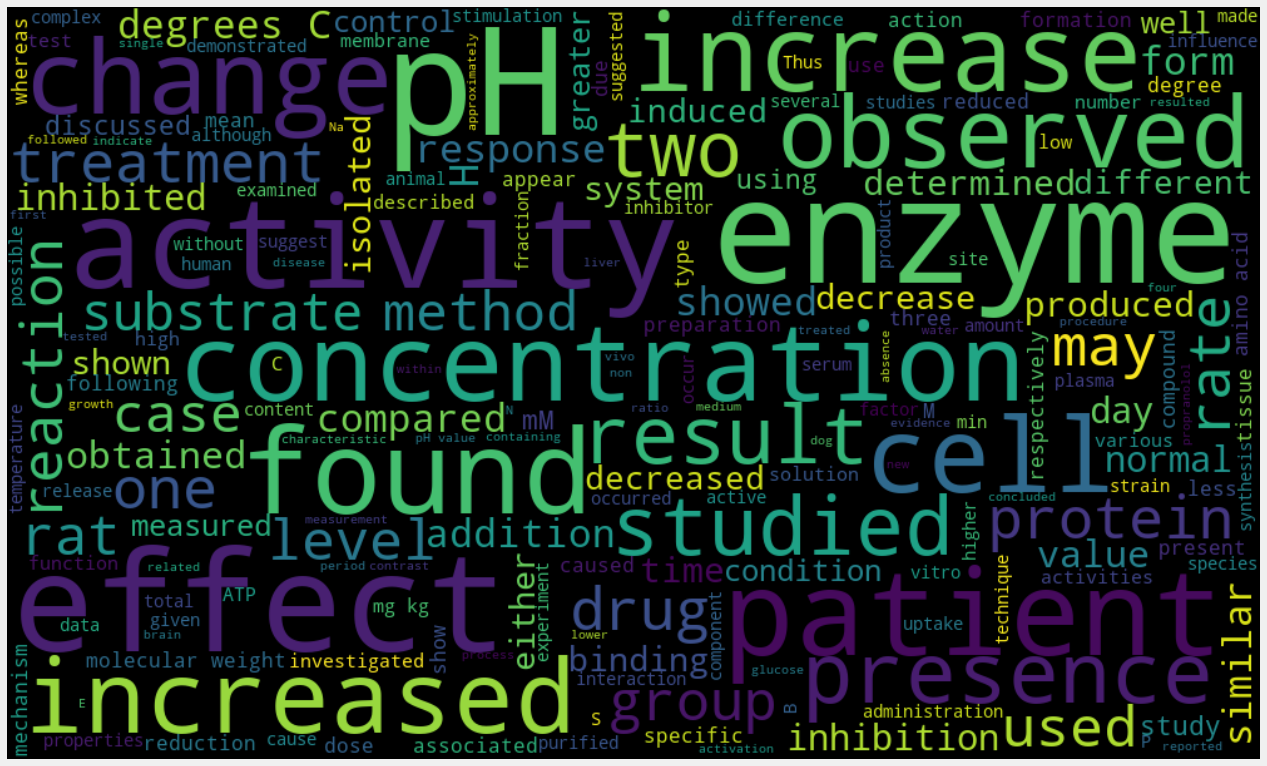

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,28))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()